https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a

https://www.kaggle.com/datatattle/covid-19-nlp-text-classification?select=Corona_NLP_test.csv

***Final Project (Presentation)***

This part of the final project involves presenting what you did for your final project. This presentation will be done during the Week 10 live session. Every student will present their work.<br>

The presentation should address the following:<br>
Slide 1: Title page<br>
Slide 2: Purpose of your analysis and research question<br>
Slide 3: Description of your dataset and source<br>
Slide 4: Description of input (or input and output) variables in your dataset<br>
Slide 5: Data preprocessing<br>
Slides 6–7: Relevant descriptive statistics, frequency tables, and/or graphs<br>
Slide 8: Data splitting or partitioning<br>
Slide 9: Code snippet for your algorithm or a screenshot of code for building the model<br>
Slide 10: Model selection and model evaluation—performance measures, graphs, and so forth.<br>
Slide 11: Conclusion<br>

<p>Find a dataset that could be analyzed using a specific algorithm or method of interest covered in this course, to answer a research question. Your written project should address the following:</p>
<p>Describe the dataset and the source. Your dataset should not be related to any dataset already used in class examples. Avoid using some popular datasets such as the iris dataset. Find some dataset that you think is unique and interesting to you. Though you can use data from the internet, avoid copying analysis examples directly from the internet. Instead, apply the knowledge you have learned from this course to your work.</p>
<p>Describe the variables, both input and output variables, that would be used for your analysis. You can include descriptive statistics for numerical variables, frequencies of categorical variables, and appropriate graphs such as bar charts for categorical variables and histograms of numerical variables.</p>
<p>State the research question to be answered through your analysis. Your research question should focus on a supervised or unsupervised learning problem.</p>
<p>Describe what you did for data preprocessing and how you partitioned the data. Also include rationale for why you preprocessed and partitioned the data the way you did.</p>
<p>You can code an algorithm from scratch to address your research question or use algorithms already built into the Python package, such as scikit-learn and statsmodels, to build a model that addresses your research question. Build different models (of the same functional form or different functional forms) that can address the research question; then compare the model to select which one has a better performance using a validation dataset. Write a brief report on how you implemented the algorithm(s) and which model you selected and why. Include validation results or graphs that supported your decision for model selection.</p>
<p>Evaluate your final (selected) model using the test dataset to understand how well your model g</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [2]:
tweets_train = pd.read_csv("Corona_NLP_train.csv")
tweets_train.columns = [c.strip(' ') for c in tweets_train.columns]

In [3]:
tweets_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
tweets_train = tweets_train[["OriginalTweet", "Sentiment"]]
tweets_train

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know its getting tough when @KameronWilds...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


In [5]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import contractions
import nltk
import re
import string

nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package words to /home/jovyan/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(w) for w in text.split(' ')])

def expand_contractions(text):
    expanded_words = []    
    for word in text.split():
        expanded_words.append(contractions.fix(word))   

    return ' '.join(expanded_words)

def remove_others(text):
    text = re.sub(r'http\S+', '', text)
    re.sub(r"\S*https?:\S*", "", text)
    text = re.sub(r'\n', "", text)
    text = re.sub(r'\r', "", text)
    text = re.sub(r'-', " ", text)
    text = text.strip()
    text = re.sub(r' +', " ", text)
    text = re.sub(r'[\(\)\[\]\^\$\+\*\.\?\/!@#%&{}\'\",;:]', "", text)
    
    return text

def clean_text(text):
    stop = set(nltk.corpus.stopwords.words('english'))
    cleaned = text.lower()
    cleaned = remove_others(cleaned)
    cleaned = expand_contractions(cleaned)
    tokens = word_tokenize(cleaned)
    cleaned = ' '.join([w for w in tokens if not w in stop])
    cleaned = lemmatize_text(cleaned)
    return cleaned

In [7]:
def clean_tweets(df, tweets_column_name):
    df["cleaned_text"] = df[tweets_column_name].replace(regex='(@\w+)|#|&|!',value='')
    df["cleaned_text"] = df["cleaned_text"].apply(clean_text)
    return df

In [8]:
tweets_train.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [9]:
tweets_train.replace({"Sentiment": {'Extremely Negative': 1, 
                                    'Negative': 1, 
                                    'Neutral': 2, 
                                    'Positive': 0,
                                    'Extremely Positive': 0}}, inplace=True)

tweets_train = tweets_train[(tweets_train["Sentiment"]<2)]

tweets_train["Sentiment"].unique()

array([0, 1])

The first time through this process, I used all of the data, classifying to all 5 outcomes. The result was a score just below 30%. This did not seem very good. Granted, rolling a 5 sided die to randomly guess an outcome would have an expected success of 20%, so I'm beating random. But, that is not too helpful.

I decided to remove luke-warm classifications and keep the extremes. The accuracy increased to 63%. That seemed good at first, but to put that in context, when I changed the outcome to the 2 extremes, I now have a coin toss, i.e., 50%. I am beating that but by about the same amount that I was beating the five sided die.

Next was to remove the neutral tweets, code extremely negative as simply negative, and the same for positive. Accuracy dropped to 0.5778.

With all of that, I returned to the original classification.

In [10]:
tweets_train.shape

(33444, 2)

In [11]:
tweets_train.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [12]:
tweets_train = clean_tweets(tweets_train.copy(), "OriginalTweet")

In [13]:
tweets_train = tweets_train[tweets_train.cleaned_text.str.len()>=30]

In [14]:
tweets_train.head()

,OriginalTweet,Sentiment,cleaned_text
1,advice Talk to your neighbours family to excha...,0,advice talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths to give elde...,0,coronavirus australia woolworth give elderly d...
3,My food stock is not the only one which is emp...,0,food stock one emptyplease panic enough food e...
4,"Me, ready to go at supermarket during the #COV...",1,ready go supermarket covid19 outbreaknot I par...
5,As news of the regions first confirmed COVID-...,0,news regions first confirmed covid 19 case ca...


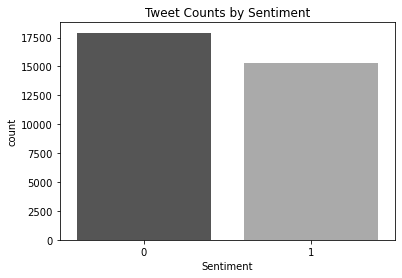

In [15]:
sns.countplot(x="Sentiment", data=tweets_train, palette='gist_gray')
#plt.xticks([0,1], ["Positive", "Negative"])
plt.xlabel("Sentiment")
plt.title("Tweet Counts by Sentiment")
plt.show()

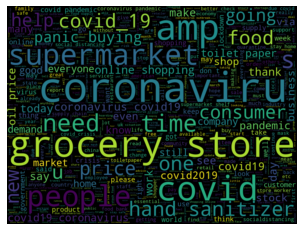

In [16]:
from wordcloud import WordCloud

text = " ".join(t for t in tweets_train.cleaned_text.astype(str))
wordcloud = WordCloud(max_words=1000, width=1000, height=750).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [17]:
# https://www.geeksforgeeks.org/find-frequency-of-each-word-in-a-string-in-python/
from collections import Counter
cnt = Counter()
words = str.split(text, " ")

cnt = Counter(words)
cnt.most_common(30)

[('coronavirus', 13186),
 ('19', 9494),
 ('covid', 9245),
 ('price', 7377),
 ('store', 6495),
 ('food', 6429),
 ('supermarket', 6178),
 ('grocery', 5411),
 ('people', 4844),
 ('amp', 4439),
 ('consumer', 4073),
 ('covid19', 4051),
 ('shopping', 2791),
 ('need', 2771),
 ('time', 2697),
 ('online', 2680),
 ('get', 2588),
 ('worker', 2579),
 ('hand', 2509),
 ('pandemic', 2499),
 ('u', 2448),
 ('panic', 2445),
 ('like', 2285),
 ('covid_19', 2266),
 ('demand', 2217),
 ('help', 2104),
 ('sanitizer', 2062),
 ('go', 2036),
 ('home', 2032),
 ('going', 1863)]

Some work could be done here to combine coronavirus, covid, 19, etc. I do not believe they will skew the outcome but it would be cleaner.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,2), stop_words="english", min_df=.1, max_features=None)

X_train = tfidf.fit_transform(tweets_train.cleaned_text.values)
y_train = tweets_train.Sentiment
X_train.shape, y_train.shape

((33208, 13), (33208,))

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [20]:
nb_classifier = MultinomialNB().fit(X_train, y_train)
nb_classifier.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [21]:
y_pred_train_nb = nb_classifier.predict(X_train)
print(f"Train accuracy: {accuracy_score(y_train, y_pred_train_nb)}")

Train accuracy: 0.577390990122862


In [22]:
nb_cv_score = cross_val_score(nb_classifier, X_train, y_train, cv=3)
print(f"Training Naive Bayes Cross Validation Score: {np.mean(nb_cv_score)}")

Training Naive Bayes Cross Validation Score: 0.5724225573732032


In [23]:
svm_classifier = SVC(probability=True, kernel="linear", random_state=42).fit(X_train, y_train)
nb_classifier.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [24]:
y_pred_train_nb_cv = svm_classifier.predict(X_train)
print(f"Support Vector Machine Train accuracy: {accuracy_score(y_train, y_pred_train_nb_cv)}")

Support Vector Machine Train accuracy: 0.5805829920501084


In [25]:
svm_cv_score = cross_val_score(svm_classifier, X_train, y_train, cv=3)
print(f"Training SVM Cross Validation Score: {np.mean(svm_cv_score)}")

Training SVM Cross Validation Score: 0.5798001471648008


Because we are tweaking the vectorization, we return to the "cleaned" dataset. 

In [26]:
from sklearn.model_selection import train_test_split

X_train_tune = tweets_train.cleaned_text
y_train_tune = tweets_train.Sentiment

X_train_tune, X_val_tune, y_train_tune, y_val_tune = train_test_split(X_train_tune, y_train_tune,
                                                                      train_size=.80,
                                                                      random_state=42)

In [27]:
pipe_nb = Pipeline([("tfidf", TfidfVectorizer(stop_words="english", norm="l1")), ("nb", MultinomialNB())])
pipe_nb.get_params()

{'memory': None,
 'steps': [('tfidf', TfidfVectorizer(norm='l1', stop_words='english')),
  ('nb', MultinomialNB())],
 'verbose': False,
 'tfidf': TfidfVectorizer(norm='l1', stop_words='english'),
 'nb': MultinomialNB(),
 'tfidf__analyzer': 'word',
 'tfidf__binary': False,
 'tfidf__decode_error': 'strict',
 'tfidf__dtype': numpy.float64,
 'tfidf__encoding': 'utf-8',
 'tfidf__input': 'content',
 'tfidf__lowercase': True,
 'tfidf__max_df': 1.0,
 'tfidf__max_features': None,
 'tfidf__min_df': 1,
 'tfidf__ngram_range': (1, 1),
 'tfidf__norm': 'l1',
 'tfidf__preprocessor': None,
 'tfidf__smooth_idf': True,
 'tfidf__stop_words': 'english',
 'tfidf__strip_accents': None,
 'tfidf__sublinear_tf': False,
 'tfidf__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tfidf__tokenizer': None,
 'tfidf__use_idf': True,
 'tfidf__vocabulary': None,
 'nb__alpha': 1.0,
 'nb__class_prior': None,
 'nb__fit_prior': True}

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid_nb = {"tfidf__min_df":[10],
                 "tfidf__ngram_range": [(1,1), (1,2), (1,3)],
                 "nb__alpha": [.1, .5, 1],
                 "nb__fit_prior": [True, False]}

grid_search_nb = GridSearchCV(pipe_nb,
                              param_grid_nb, cv=3,
                              scoring="accuracy",
                              return_train_score=True)

In [29]:
grid_search_nb.fit(X_train_tune, y_train_tune)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(norm='l1',
                                                        stop_words='english')),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0.1, 0.5, 1],
                         'nb__fit_prior': [True, False], 'tfidf__min_df': [10],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             return_train_score=True, scoring='accuracy')

In [30]:
best_est_nb = grid_search_nb.best_estimator_
best_est_nb

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(min_df=10, norm='l1', stop_words='english')),
                ('nb', MultinomialNB(alpha=1, fit_prior=False))])

In [31]:
grid_search_nb.best_params_

{'nb__alpha': 1,
 'nb__fit_prior': False,
 'tfidf__min_df': 10,
 'tfidf__ngram_range': (1, 1)}

In [32]:
print(f"Score on training set: {best_est_nb.score(X_train_tune, y_train_tune)}")
print(f"Score on validation set: {best_est_nb.score(X_val_tune, y_val_tune)}")

Score on training set: 0.8277873974252804
Score on validation set: 0.7898223426678711


On to the test data.

In [33]:
tweets_test = pd.read_csv("Corona_NLP_test.csv")
tweets_test.columns = [c.strip(' ') for c in tweets_test.columns]
tweets_test.shape

(3798, 6)

In [34]:
tweets_test.replace({"Sentiment": {'Extremely Negative': 1, 
                                    'Negative': 1, 
                                    'Neutral': 2, 
                                    'Positive': 0,
                                    'Extremely Positive': 0}}, inplace=True)

tweets_test = tweets_test[(tweets_test["Sentiment"]<2)]

tweets_test["Sentiment"].unique()

array([1, 0])

In [35]:
tweets_test.isnull().sum()

UserName           0
ScreenName         0
Location         712
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [36]:
tweets_test = clean_tweets(tweets_test.copy(), "OriginalTweet")
tweets_test = tweets_test[tweets_test.cleaned_text.str.len()>=30]

X_test = tfidf.transform(tweets_test.cleaned_text.values)
y_test = tweets_test.Sentiment

X_test.shape, y_test.shape

((3170, 13), (3170,))

In [37]:
y_pred_test = svm_classifier.predict(X_test)

In [38]:
y_pred_test.shape

(3170,)

In [39]:
X_test_tune = tweets_test.cleaned_text
y_test_tune = tweets_test.Sentiment

In [40]:
print(f"Best Estimate Score on test data: {best_est_nb.score(X_test_tune, y_test_tune)}")

Best Estimate Score on test data: 0.7854889589905363


In [41]:
pipe_svm = Pipeline([("tfidf", TfidfVectorizer(stop_words="english", norm="l1")), ("svm", SVC(probability=True, kernel="linear", random_state=42))])
pipe_svm.get_params()

{'memory': None,
 'steps': [('tfidf', TfidfVectorizer(norm='l1', stop_words='english')),
  ('svm', SVC(kernel='linear', probability=True, random_state=42))],
 'verbose': False,
 'tfidf': TfidfVectorizer(norm='l1', stop_words='english'),
 'svm': SVC(kernel='linear', probability=True, random_state=42),
 'tfidf__analyzer': 'word',
 'tfidf__binary': False,
 'tfidf__decode_error': 'strict',
 'tfidf__dtype': numpy.float64,
 'tfidf__encoding': 'utf-8',
 'tfidf__input': 'content',
 'tfidf__lowercase': True,
 'tfidf__max_df': 1.0,
 'tfidf__max_features': None,
 'tfidf__min_df': 1,
 'tfidf__ngram_range': (1, 1),
 'tfidf__norm': 'l1',
 'tfidf__preprocessor': None,
 'tfidf__smooth_idf': True,
 'tfidf__stop_words': 'english',
 'tfidf__strip_accents': None,
 'tfidf__sublinear_tf': False,
 'tfidf__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tfidf__tokenizer': None,
 'tfidf__use_idf': True,
 'tfidf__vocabulary': None,
 'svm__C': 1.0,
 'svm__break_ties': False,
 'svm__cache_size': 200,
 'svm__class_weight':

In [42]:
param_grid_svm = {"tfidf__min_df":[10],
                  "tfidf__ngram_range": [(1,1), (1,2), (1,3)],
                  "svm__C": [1,10],
                  "svm__kernel": ["linear", "rbf"]}

grid_search_svm = GridSearchCV(pipe_svm,
                               param_grid_svm, cv=3,
                               scoring="accuracy",
                               return_train_score=True)

In [43]:
grid_search_svm.fit(X_train_tune, y_train_tune)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(norm='l1',
                                                        stop_words='english')),
                                       ('svm',
                                        SVC(kernel='linear', probability=True,
                                            random_state=42))]),
             param_grid={'svm__C': [1, 10], 'svm__kernel': ['linear', 'rbf'],
                         'tfidf__min_df': [10],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             return_train_score=True, scoring='accuracy')

In [44]:
best_est_svm = grid_search_svm.best_estimator_
best_est_svm

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(min_df=10, norm='l1', stop_words='english')),
                ('svm', SVC(C=10, probability=True, random_state=42))])

In [45]:
grid_search_svm.best_params_

{'svm__C': 10,
 'svm__kernel': 'rbf',
 'tfidf__min_df': 10,
 'tfidf__ngram_range': (1, 1)}

In [46]:
print(f"Score on training set: {best_est_svm.score(X_train_tune, y_train_tune)}")
print(f"Score on validation set: {best_est_svm.score(X_val_tune, y_val_tune)}")
print(f"Best Estimate Score on test data: {best_est_svm.score(X_test_tune, y_test_tune)}")

Score on training set: 0.999736505307536
Score on validation set: 0.8504968383017163
Best Estimate Score on test data: 0.8296529968454258


The above shows improvement from the non-tuned model to the tuned model. The test data accuracy tops to around 83%, from < 60%. With more time and computing power, we may be able to squeeze more accuracy from a better tuned model. This demonstrated that we could increase the accuracy from a coin toss to something with predictive power.

Once that analysis was complete, I wondered what the model would do with "new" data. This would be a real world test. We create models, selecting the best one. Then we tune the model and put it into production. This next part is production.

In [47]:
test_other = pd.read_csv("https://raw.githubusercontent.com/MohamedAfham/Twitter-Sentiment-Analysis-Supervised-Learning/master/Data/train_tweets.csv")
test_other.columns = [c.strip(' ') for c in test_other.columns]
test_other

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [48]:
test_other = clean_tweets(test_other.copy(), "tweet")
test_other = test_other[test_other.cleaned_text.str.len()>=30]

X_test_other = tfidf.transform(test_other.cleaned_text.values)
y_test_other = test_other.label

X_test_other.shape, y_test_other.shape

((27629, 13), (27629,))

In [49]:
print(f"Naive Bayes Best Estimate Score on test set: {best_est_nb.score(test_other.tweet, test_other.label)}")
print(f"SVM Best Estimate Score on test set: {best_est_svm.score(test_other.tweet, test_other.label)}")

Naive Bayes Best Estimate Score on test set: 0.6884794961815484
SVM Best Estimate Score on test set: 0.717868905859785
